In [1]:
from datetime import datetime, timedelta

from stock_data_repo import StockDataRepo
from backtest import Backtester, BacktestResult
from strategies import MinVarianceAuxiliaryData, min_variance_portfolio

In [2]:
import plotly.express as px

In [283]:
backtester = Backtester(datetime(2020, 2, 1, 0, 0, 0))

In [308]:
FACTOR_CANDIDATES = [
    "SPY", # Large cap.
    "IWF", # Growth.
    "IWM", # Small cap.
    "MTUM", # Momentum.
#     "VLUE", # Value.
#     "SDY", # Dividend.
]
LONG_CANDIDATES = [
    "BABA","BBBY","BILL","BLK","CRM","DDOG","FDX","FIVN","FRPT","FVRR","HUBS","ISRG","ITB","NET","NIO","NOW","NVDA","NVTA","OKTA","PBW","PINS","PTON","RH","SE","SNAP","SQ","TRUP","TTD","TWLO","TXG","UBER","UPS","VEEV","VXX","ZG",
#     "VLUE"
]
SHORT_CANDIDATES = [
    "AMC","AVB","BOX","CLDR","CSCO","CVX","DBX","EQR","IBM","IYZ","MO","MSFT","NEWR","PD","PM","PS","RP","SDY","T","TDOC","VMW","VRSN","WFC","WORK","XOM","ZUO"
    
] + FACTOR_CANDIDATES
r = backtester.backtest(LONG_CANDIDATES, SHORT_CANDIDATES, min_variance_portfolio)

In [309]:
print("LONG FINVIZ - ", "https://elite.finviz.com/screener.ashx?v=111&t=" + ",".join(LONG_CANDIDATES))
print()
print("SHORT FINVIZ - ", "https://elite.finviz.com/screener.ashx?v=111&t=" + ",".join(SHORT_CANDIDATES))

LONG FINVIZ -  https://elite.finviz.com/screener.ashx?v=111&t=BABA,BBBY,BILL,BLK,CRM,DDOG,FDX,FIVN,FRPT,FVRR,HUBS,ISRG,ITB,NET,NIO,NOW,NVDA,NVTA,OKTA,PBW,PINS,PTON,RH,SE,SNAP,SQ,TRUP,TTD,TWLO,TXG,UBER,UPS,VEEV,VXX,ZG

SHORT FINVIZ -  https://elite.finviz.com/screener.ashx?v=111&t=AMC,AVB,BOX,CLDR,CSCO,CVX,DBX,EQR,IBM,IYZ,MO,MSFT,NEWR,PD,PM,PS,RP,SDY,T,TDOC,VMW,VRSN,WFC,WORK,XOM,ZUO,SPY,IWF,IWM,MTUM


In [310]:

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=1, shared_xaxes=True)

cum_returns = (r.returns_history+1).cumprod()
fig.add_trace(go.Scatter(x=cum_returns.index, y=cum_returns), row=1, col=1)
fig.update_yaxes(type="log", row=1, col=1)


long_allocations = r.allocation_history[[c for c in r.allocation_history.columns if c in LONG_CANDIDATES]]
for (k, v) in long_allocations.items():
    fig.add_trace(go.Scatter(x=r.allocation_history.index, y=v, name=k, stackgroup='one'), row=2, col=1)
    
short_allocations = r.allocation_history[[c for c in r.allocation_history.columns if c in SHORT_CANDIDATES]]
for (k, v) in short_allocations.items():
    fig.add_trace(go.Scatter(x=r.allocation_history.index, y=v, name=k, stackgroup='one'), row=3, col=1)

fig.update_layout(
    autosize=False,
    width=1000,
    height=1200,)
fig.show()

## Sorted by weight

Start date,2020-02-03
End date,2020-10-22
Total months,8
,Backtest
Annual return,130.811%
Cumulative returns,84.177%
Annual volatility,12.667%
Sharpe ratio,6.68
Calmar ratio,27.72
Stability,0.95
Max drawdown,-4.72%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,4.72,2020-03-25,2020-04-17,2020-05-05,30
1,2.03,2020-03-12,2020-03-16,2020-03-18,5
2,1.79,2020-10-20,2020-10-22,NaT,NaN
3,1.70,2020-02-03,2020-02-06,2020-02-11,7
4,1.66,2020-05-19,2020-05-26,2020-06-10,17


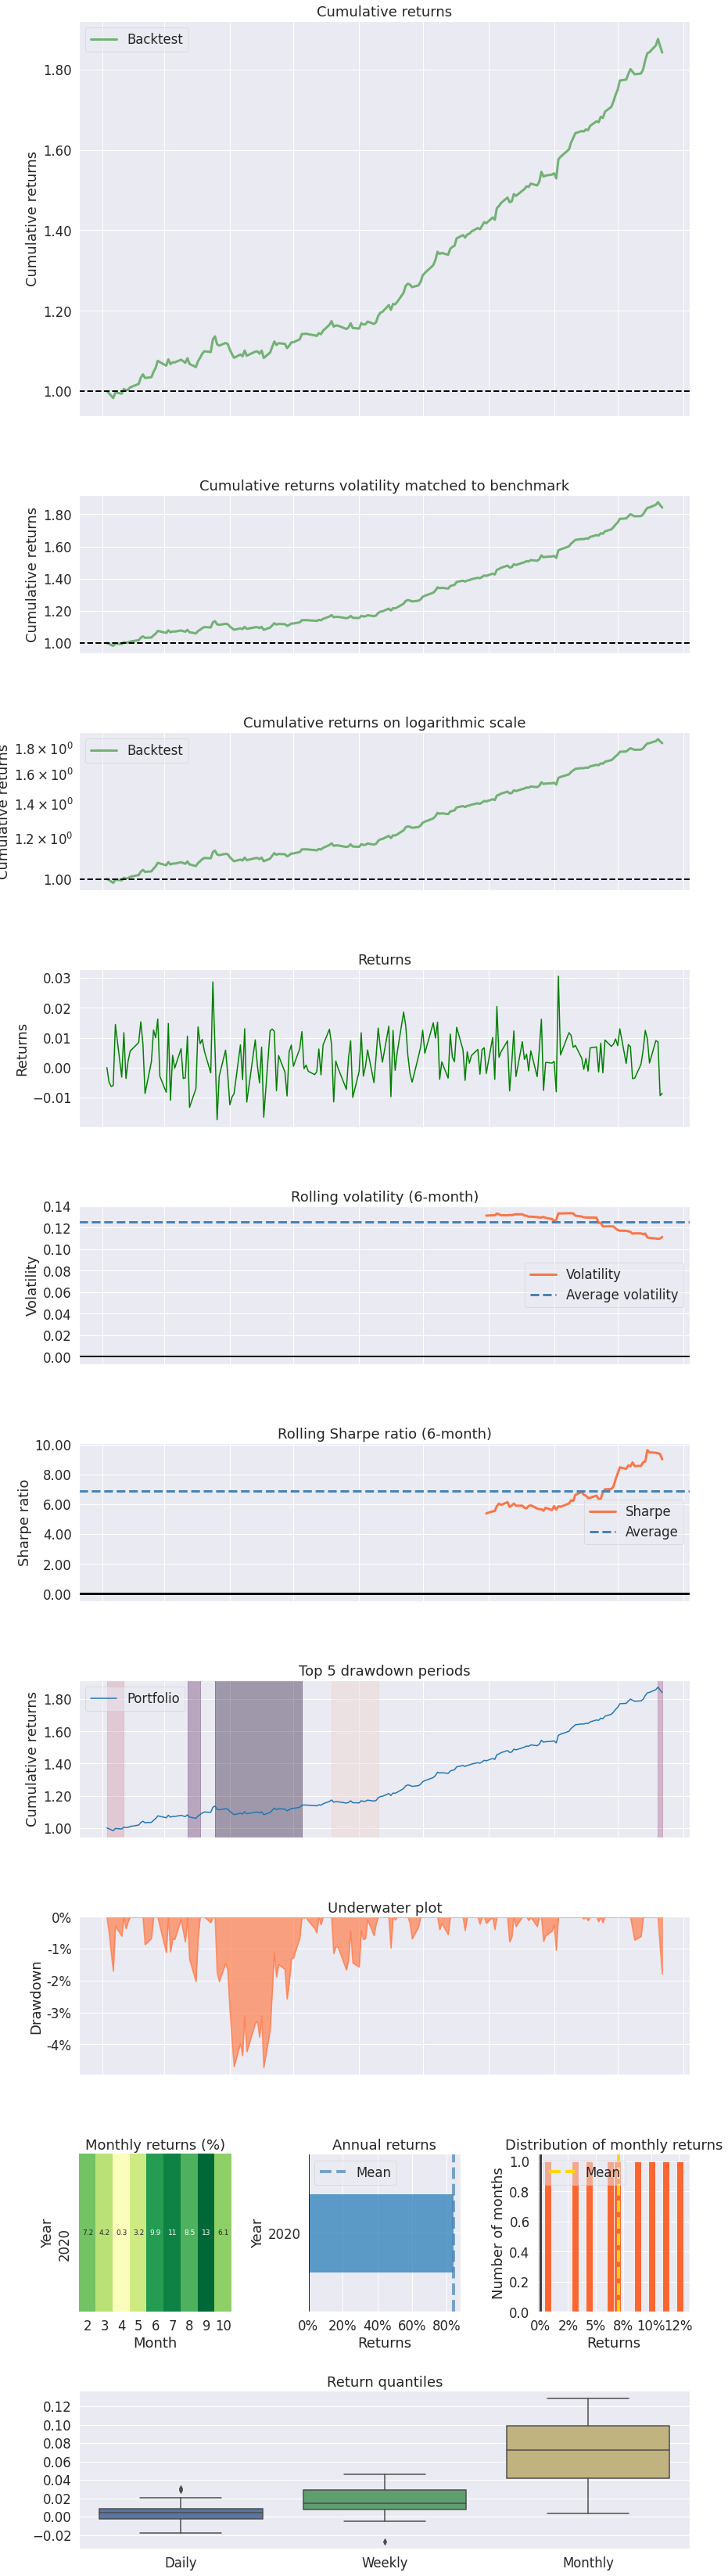

In [311]:
import pyfolio as pf
pf.create_returns_tear_sheet(r.returns_history)


In [10]:
if False:
    r.save_most_recent_allocation("./allocations/", leverage=1.5)